In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random


2.	Графы (15 баллов).

Написать модуль на языке python с использованием классов который имеет следующие методы (10):

А. Добавление узла с какой-то информацией.
Б. Добавление ребра между двумя узлами;
B. Генерация случайного графа;
Г. Отрисовка получившегося графа через matplotlib.

Реализовать следующий алгоритм (5):

Вы выбираете из группы из N друзей, с кем пойти на пикник. Однако друзья, связанные ребром на графе, находятся в очень недружественных отношениях друг с другом, поэтому, если они оба отправятся на пикник, он будет испорчен. Чтобы на пикнике было как можно больше друзей, кого следует пригласить? Протестируйте алгоритм на случайных графах (5 - 10 штук)  различного размера, отрисуйте случайные графы и выведите финальный список на экран или в файл.


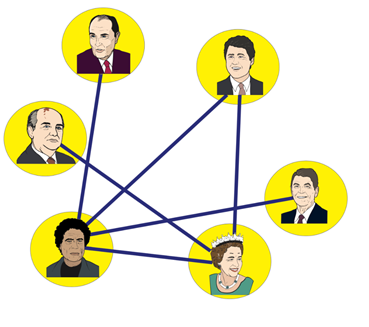

1. Глобально класс графа это дикт, в виде списка смежности
2. по факту просят найти максимальный длинный путь и из него выкинуть половину недружелюбных
3. проверить наличие интровертов, которые ни с кем не дружат, просто добавить их к сумме путей

In [71]:
""" A Python Class
A simple Python graph class, demonstrating the essential 
facts and functionalities of graphs.
"""

class Graph(object):

    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self._graph_dict = graph_dict

    def edges(self, vertice):
        """ returns a list of all the edges of a vertice"""
        return self._graph_dict[vertice]
        
    def all_vertices(self):
        """ returns the vertices of a graph as a set """
        return set(self._graph_dict.keys())

    def all_edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in 
            self._graph_dict, a key "vertex" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if vertex not in self._graph_dict:
            self._graph_dict[vertex] = []

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        vertex1, vertex2 = tuple(edge)
        for x, y in [(vertex1, vertex2), (vertex2, vertex1)]:
            if x in self._graph_dict:
                self._graph_dict[x].append(y)
            else:
                self._graph_dict[x] = [y]

    def __generate_edges(self):
        """ A static method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two 
            vertices 
        """
        edges = []
        for vertex in self._graph_dict:
            for neighbour in self._graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges
    
    def __iter__(self):
        self._iter_obj = iter(self._graph_dict)
        return self._iter_obj
    
    def __next__(self):
        """ allows us to iterate over the vertices """
        return next(self._iter_obj)

    def __str__(self):
        res = "vertices: "
        for k in self._graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

    def find_path(self, start_vertex, end_vertex, path=None):
        """ find a path from start_vertex to end_vertex 
            in graph """
        if path == None:
            path = []
        graph = self._graph_dict
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return path
        if start_vertex not in graph:
            return None
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_path = self.find_path(vertex, 
                                               end_vertex, 
                                               path)
                if extended_path: 
                    return extended_path
        return None
    
    
    def find_all_paths(self, start_vertex, end_vertex, path=[]):
        """ find all paths from start_vertex to 
            end_vertex in graph """
        graph = self._graph_dict 
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return [path]
        if start_vertex not in graph:
            return []
        paths = []
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_paths = self.find_all_paths(vertex, 
                                                     end_vertex, 
                                                     path)
                for p in extended_paths: 
                    paths.append(p)
        return paths
#We check in the following the way of working of our find_path and find_all_paths methods.
    
    def find_isolated_vertices(self):
        """ returns a list of isolated vertices. """
        graph = self._graph_dict
        isolated = []
        for vertex in graph:
            #print(isolated, vertex)
            if not graph[vertex]:
                isolated += [vertex]
        return isolated
    
    # def DFS(self): #  №G,v,seen=None,path=None):
    #     if seen is None: visited = []
    #     if path is None: path = [v]

    #     seen.append(v)

    #     paths = []
    #     for t in G[v]:
    #         if t not in seen:
    #             t_path = path + [t]
    #             paths.append(tuple(t_path))
    #             paths.extend(DFS(G, t, seen[:], t_path))
    #     return paths

    
    def generate_graph_dict(list_verice): # через range сделать для чиселок
        generated_dict = {i: set(random.sample([j for j in list_verice if i != j], random.randrange(1, len(list_verice) - 1))) # замена 1->0 генерирует изолированные вершины
        for i in list_verice}
        #self._graph_dict = generated_dict
        return Graph(generated_dict)
    
    def draw_graph(self):
        G = nx.Graph(self._graph_dict)
        nx.draw(G,  with_labels = True)

        

In [72]:
a = (Graph.generate_graph_dict(['A','B','C','D','E','F','G','H']))
a._graph_dict.keys()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

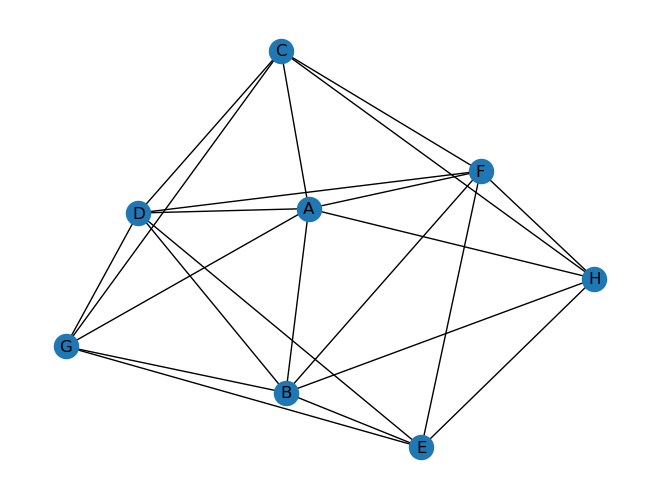

In [73]:
a.draw_graph()

In [4]:
from graphs import *

In [9]:
a = (Graph.generate_graph_dict(['A','B','C','D','E','F','G','H']))
a._graph_dict

{'A': {'B', 'C', 'D', 'E', 'F', 'G'},
 'B': {'D', 'E', 'F', 'G', 'H'},
 'C': {'D', 'E', 'F', 'G', 'H'},
 'D': {'B', 'C', 'E', 'F'},
 'E': {'A', 'B', 'C', 'D', 'G'},
 'F': {'A', 'B', 'C', 'E', 'G', 'H'},
 'G': {'D', 'E'},
 'H': {'B', 'C', 'D', 'F', 'G'}}

In [11]:
a.draw_graph()


TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

In [4]:
pip install --upgrade matplotlib


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 7.6/7.6 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 160.2/160.2 kB 4.8 MB/s eta 0:00:00


In [2]:
def draw(G, pos=None, ax=None, **kwds):
    """Draw the graph G with Matplotlib.

    Draw the graph as a simple representation with no node
    labels or edge labels and using the full Matplotlib figure area
    and no axis labels by default.  See draw_networkx() for more
    full-featured drawing that allows title, axis labels etc.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary, optional
        A dictionary with nodes as keys and positions as values.
        If not specified a spring layout positioning will be computed.
        See :py:mod:`networkx.drawing.layout` for functions that
        compute node positions.

    ax : Matplotlib Axes object, optional
        Draw the graph in specified Matplotlib axes.

    kwds : optional keywords
        See networkx.draw_networkx() for a description of optional keywords.

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> nx.draw(G)
    >>> nx.draw(G, pos=nx.spring_layout(G))  # use spring layout

    See Also
    --------
    draw_networkx
    draw_networkx_nodes
    draw_networkx_edges
    draw_networkx_labels
    draw_networkx_edge_labels

    Notes
    -----
    This function has the same name as pylab.draw and pyplot.draw
    so beware when using `from networkx import *`

    since you might overwrite the pylab.draw function.

    With pyplot use

    >>> import matplotlib.pyplot as plt
    >>> G = nx.dodecahedral_graph()
    >>> nx.draw(G)  # networkx draw()
    >>> plt.draw()  # pyplot draw()

    Also see the NetworkX drawing examples at
    https://networkx.org/documentation/latest/auto_examples/index.html
    """
    import matplotlib.pyplot as plt

    if ax is None:
        cf = plt.gcf()
    else:
        cf = ax.get_figure()
    cf.set_facecolor("w")
    if ax is None:
        if cf.axes:
            ax = cf.gca()
        else:
            ax = cf.add_axes((0, 0, 1, 1))

    if "with_labels" not in kwds:
        kwds["with_labels"] = "labels" in kwds

    draw_networkx(G, pos=pos, ax=ax, **kwds)
    ax.set_axis_off()
    plt.draw_if_interactive()
    return

AttributeError: 'Graph' object has no attribute 'is_directed'

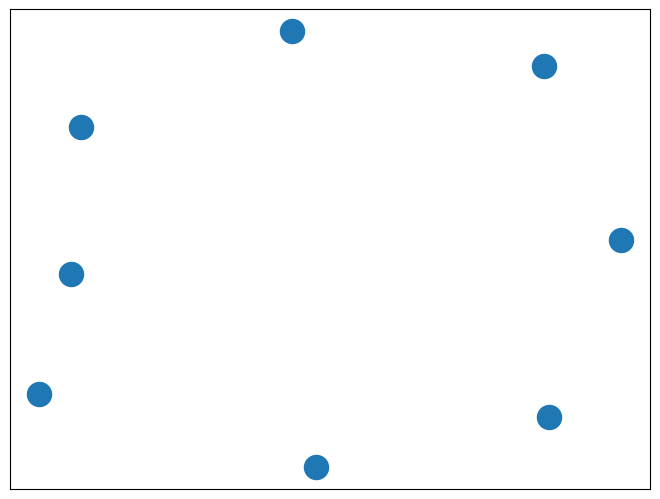

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

nx.draw(d)
plt.draw()
plt.show()

In [9]:
import random

In [10]:
a = (Graph.generate_graph_dict(['A','B','C','D','E','F','G','H']))

In [63]:
a = Graph(a)

In [11]:
q = ['A','B','C','D','E','F','G','H']
d = {i: set(random.sample([j for j in q if i != j], random.randrange(1, len(q) - 1))) # замена 1->0 генерирует изолированные вершины
     for i in q}
d = Graph(d)
d._graph_dict 

{'A': {'B', 'G'},
 'B': {'A', 'D', 'E', 'F', 'G', 'H'},
 'C': {'E', 'H'},
 'D': {'B'},
 'E': {'A', 'C', 'G'},
 'F': {'A', 'B', 'D', 'E', 'G'},
 'G': {'B'},
 'H': {'A', 'D', 'E'}}

In [ ]:
for elements in d._graph_dict.keys():
    AE paths = d.find_all_paths('A','E')

In [80]:
d._graph_dict.keys()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

In [85]:
d.find_all_paths('A','E')

[['A', 'G', 'E'],
 ['A', 'G', 'D', 'E'],
 ['A', 'G', 'D', 'B', 'E'],
 ['A', 'G', 'D', 'F', 'B', 'E'],
 ['A', 'G', 'D', 'F', 'C', 'B', 'E'],
 ['A', 'G', 'D', 'F', 'C', 'H', 'B', 'E'],
 ['A', 'G', 'D', 'F', 'H', 'B', 'E'],
 ['A', 'E'],
 ['A', 'C', 'B', 'E'],
 ['A', 'C', 'B', 'D', 'E'],
 ['A', 'C', 'B', 'D', 'F', 'G', 'E'],
 ['A', 'C', 'B', 'D', 'F', 'H', 'G', 'E'],
 ['A', 'C', 'B', 'H', 'F', 'G', 'E'],
 ['A', 'C', 'B', 'H', 'F', 'G', 'D', 'E'],
 ['A', 'C', 'B', 'H', 'F', 'D', 'E'],
 ['A', 'C', 'B', 'H', 'G', 'E'],
 ['A', 'C', 'B', 'H', 'G', 'D', 'E'],
 ['A', 'C', 'G', 'E'],
 ['A', 'C', 'G', 'D', 'E'],
 ['A', 'C', 'G', 'D', 'B', 'E'],
 ['A', 'C', 'G', 'D', 'F', 'B', 'E'],
 ['A', 'C', 'G', 'D', 'F', 'H', 'B', 'E'],
 ['A', 'C', 'D', 'E'],
 ['A', 'C', 'D', 'B', 'E'],
 ['A', 'C', 'D', 'B', 'H', 'F', 'G', 'E'],
 ['A', 'C', 'D', 'B', 'H', 'G', 'E'],
 ['A', 'C', 'D', 'F', 'B', 'E'],
 ['A', 'C', 'D', 'F', 'B', 'H', 'G', 'E'],
 ['A', 'C', 'D', 'F', 'G', 'E'],
 ['A', 'C', 'D', 'F', 'H', 'B', 'E'],


In [42]:
all_paths = DFS(G, '1')
max_len   = max(len(p) for p in all_paths)
max_paths = [p for p in all_paths if len(p) == max_len]

NameError: name 'G' is not defined

In [33]:
def DFS(G,v,seen=None,path=None):
    if seen is None: seen = []
    if path is None: path = [v]

    seen.append(v)

    paths = []
    for t in G[v]:
        if t not in seen:
            t_path = path + [t]
            paths.append(tuple(t_path))
            paths.extend(DFS(G, t, seen[:], t_path))
    return paths

In [11]:
d

{'A': {'B', 'C', 'H'},
 'B': {'C', 'D', 'F', 'H'},
 'C': {'A', 'B', 'D', 'G', 'H'},
 'D': set(),
 'E': {'C'},
 'F': set(),
 'G': {'C', 'D'},
 'H': {'A', 'B'}}

In [22]:
import random
#random.seed(0)

q = ['A','B','C','D','E','F','G','H']
d = {i: set(random.sample([j for j in q if i != j], random.randrange(1, len(q) - 1))) # замена 1->0 генерирует изолированные вершины
     for i in q}
d

{'A': {'D'},
 'B': {'A', 'C', 'G', 'H'},
 'C': {'A', 'D', 'E', 'F', 'G', 'H'},
 'D': {'A', 'C', 'E', 'F', 'G', 'H'},
 'E': {'A', 'B', 'F', 'G', 'H'},
 'F': {'A', 'B', 'C', 'D', 'E', 'H'},
 'G': {'A', 'B', 'C', 'D', 'F', 'H'},
 'H': {'A', 'F', 'G'}}

In [23]:
d = Graph(d)

In [30]:
all_paths = d.DFS()

TypeError: DFS() missing 1 required positional argument: 'v'

In [35]:
all_paths = [p for ps in [DFS(d, n) for n in set(d)] for p in ps]


TypeError: 'Graph' object is not subscriptable

In [24]:
isoletedVert = d.find_isolated_vertices()

In [25]:
d.DFS()

TypeError: DFS() missing 1 required positional argument: 'v'

In [14]:
isoletedVert

['D', 'F']

In [126]:
def find_isolated_vertices(self):
    """ returns a list of isolated vertices. """
    graph = self._graph_dict
    isolated = []
    for vertex in graph:
        print(isolated, vertex)
        if not graph[vertex]:
            isolated += [vertex]
    return isolated

TypeError: 'Graph' object is not subscriptable

In [152]:
from collections import defaultdict

def DFS(G,v,seen=None,path=None):
    if seen is None: seen = []
    if path is None: path = [v]

    seen.append(v)

    paths = []
    for t in G[v]:
        if t not in seen:
            t_path = path + [t]
            paths.append(tuple(t_path))
            paths.extend(DFS(G, t, seen[:], t_path))
    return paths


# Define graph by edges
edges = [['1', '2'], ['2', '4'], ['1', '11'], ['4', '11']]

# Build graph dictionary
G = defaultdict(list)
for (s,t) in edges:
    G[s].append(t)
    G[t].append(s)

# Run DFS, compute metrics
all_paths = DFS(G, '1')
max_len   = max(len(p) for p in all_paths)
max_paths = [p for p in all_paths if len(p) == max_len]

# Output
print("All Paths:")
print(all_paths)
print("Longest Paths:")
for p in max_paths: print("  ", p)
print("Longest Path Length:")
print(max_len)

All Paths:
[('1', '2'), ('1', '2', '4'), ('1', '2', '4', '11'), ('1', '11'), ('1', '11', '4'), ('1', '11', '4', '2')]
Longest Paths:
   ('1', '2', '4', '11')
   ('1', '11', '4', '2')
Longest Path Length:
4


Graph with 8 nodes and 21 edges


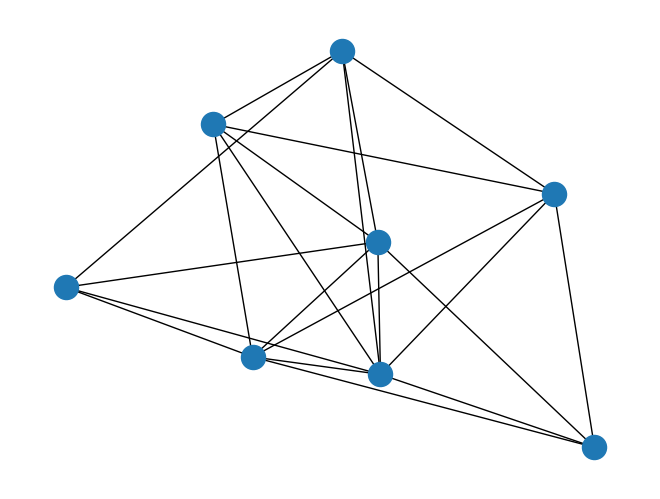

In [95]:
g = nx.Graph(d)
print(g)
nx.draw(g)

In [121]:
G

{0: [1, 3, 4, 5, 6, 7, 8, 9],
 1: [0, 2, 3, 4, 5, 6, 7, 8, 9],
 2: [1, 3, 4, 5, 6, 7, 8, 9],
 3: [0, 1, 2, 4, 5, 6, 7, 8, 9],
 4: [0, 1, 2, 3, 5, 6, 7, 8, 9],
 5: [0, 1, 2, 3, 4, 6, 7, 8, 9],
 6: [0, 1, 2, 3, 4, 5, 7, 8, 9],
 7: [0, 1, 2, 3, 4, 5, 6, 8, 9],
 8: [0, 1, 2, 3, 4, 5, 6, 7, 9],
 9: [0, 1, 2, 3, 4, 5, 6, 7, 8]}

{0: [1, 3, 4, 5, 6, 7, 8, 9], 1: [0, 2, 3, 4, 5, 6, 7, 8, 9], 2: [1, 3, 4, 5, 6, 7, 8, 9], 3: [0, 1, 2, 4, 5, 6, 7, 8, 9], 4: [0, 1, 2, 3, 5, 6, 7, 8, 9], 5: [0, 1, 2, 3, 4, 6, 7, 8, 9], 6: [0, 1, 2, 3, 4, 5, 7, 8, 9], 7: [0, 1, 2, 3, 4, 5, 6, 8, 9], 8: [0, 1, 2, 3, 4, 5, 6, 7, 9], 9: [0, 1, 2, 3, 4, 5, 6, 7, 8]}


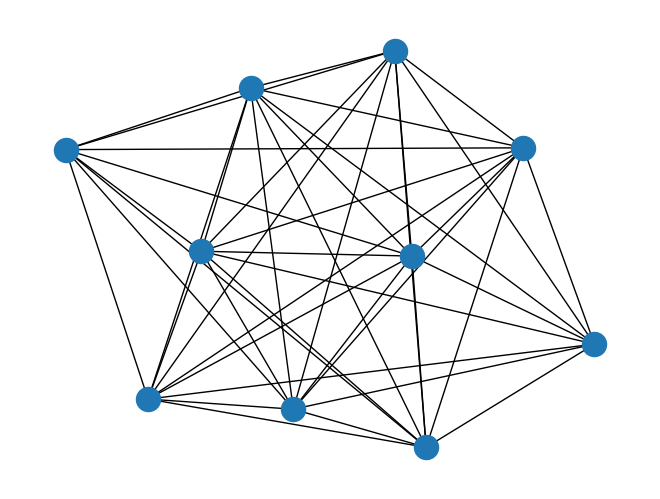

In [120]:
G = random_graph(10, 0)
g = nx.Graph(G)
print(G)
nx.draw(g)

In [44]:
abvgd = Graph()
abvgd.

In [33]:
g = { "a" : {"d"},
      "b" : {"c"},
      "c" : {"b", "c", "d", "e"},
      "d" : {"a", "c"},
      "e" : {"c"},
      "f" : {}
    }


graph = Graph(g)
graph


In [37]:
h = { "a" : {},
      "b" : {},
      "c" : {},
      "d" : {},
      "e" : {},
      "f" : {}
    }
graph = Graph(h)


In [38]:

print("Vertices of graph:")
print(graph.all_vertices())

print("Edges of graph:")
print(graph.all_edges())


print('The path from vertex "a" to vertex "b":')
path = graph.find_path("a", "b")
print(path)

print('The path from vertex "a" to vertex "f":')
path = graph.find_path("a", "f")
print(path)

print('The path from vertex "c" to vertex "c":')
path = graph.find_path("c", "c")
print(path)

Vertices of graph:
{'d', 'f', 'c', 'e', 'b', 'a'}
Edges of graph:
[]
The path from vertex "a" to vertex "b":
None
The path from vertex "a" to vertex "f":
None
The path from vertex "c" to vertex "c":
['c']


In [3]:
G.add_node(1)

In [5]:
G.add_nodes_from([2, 3])

In [13]:
G.nodes, 

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [14]:
list(G.edges)


[(0, 1),
 (0, 4),
 (0, 5),
 (1, 2),
 (1, 6),
 (2, 3),
 (2, 7),
 (3, 4),
 (3, 8),
 (4, 9),
 (5, 7),
 (5, 8),
 (6, 8),
 (6, 9),
 (7, 9)]

In [ ]:
def generate_edges(graph):
    edges = []

    # for each node in graph
    for node in graph:

        # for each neighbour node of a single node
        for neighbour in graph[node]:
            # if edge exists then append
            edges.append((node, neighbour))
    return edges

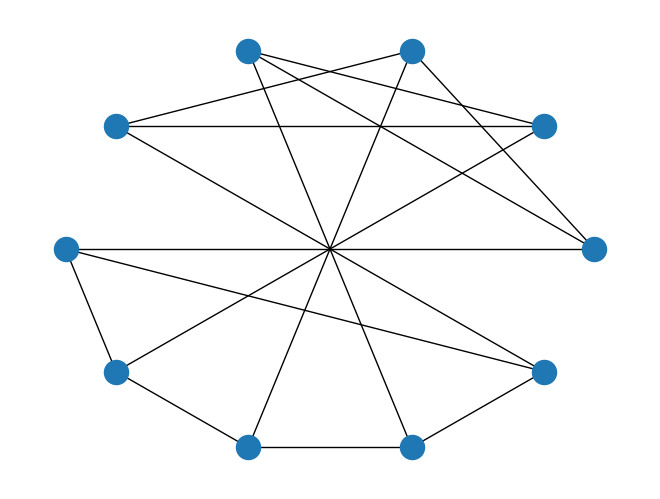

In [17]:
nx.draw_shell(G)

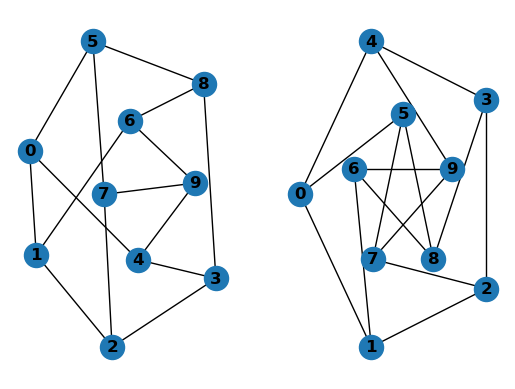

In [18]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

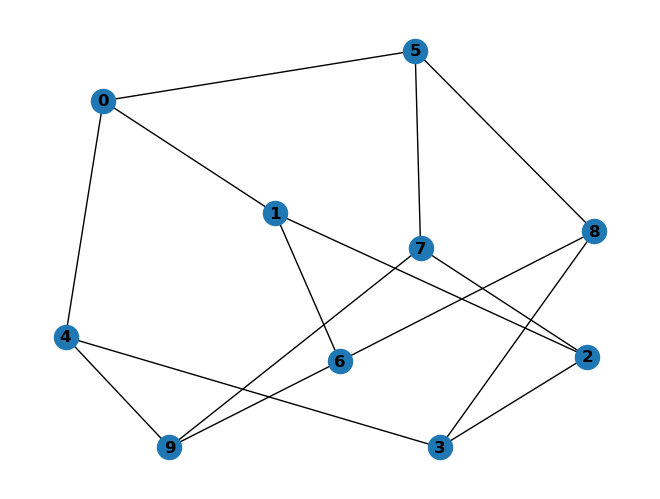

In [19]:
nx.draw(G, with_labels=True, font_weight='bold')
